# 1-D Heat equation

In this notebook, we will solve the heat equation in One dimension

## Equation

The heat equation is detailed at : https://en.wikipedia.org/wiki/Von_Neumann_stability_analysis.

We will solve first a periodic version of the problem.
We start by computing the derivatives

## First derivative.

The fist derivative of a function using centred finite differences is the following

$dudx_i =( u_{i+1} - u_{i-1} ) / (2*dx)$

A function computing this on a numpy array looks like:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

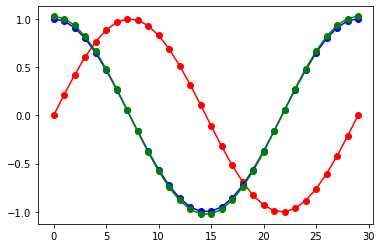

In [5]:
def grad(arr, dx):
    """Compute gradient using second order central difference
    
    note:
      arr[:] is :     [X0,X1,X2,X3,X4,X5,X6,X7,X8,X9]
      arr[1:-1] is :     [X1,X2,X3,X4,X5,X6,X7,X8]
      arr[2:] is :          [X2,X3,X4,X5,X6,X7,X8,X9]
      arr[:-2] is :   [X0,X1,X2,X3,X4,X5,X6,X7]
      
    
    """
    out = np.ones_like(arr)
    out[1:-1]= (arr[2:]-arr[:-2])/(2*dx)
    out[0] = (arr[1]-arr[-2])/(2*dx)
    out[-1] = (arr[1]-arr[-2])/(2*dx)
    return out
    

    
    
# the following sine function is ONLY for test purposes!
# since the derivative of a sinus is a cosinus.
# do not focus on this function...

test_size= 2.*np.pi
dx = test_size /30
x_coor = np.linspace(0, test_size, 30)
sin_ = np.sin(x_coor)
cos_ = np.cos(x_coor)
out = grad(sin_, dx)
plt.plot(sin_, "-or")
plt.plot(cos_, "-ob")
plt.plot(out, "-og")
plt.show()



### Periodic with repetition


```
------------- .............
|           | .           . 
|           | .           . 
|           | .           . 
|           | .           . 
------------- .............
0123       -1 0123       -1

```
### Periodic without repetition
```
-------------.............
|           |.           . 
|           |.           . 
|           |.           . 
|           |.           . 
-------------.............
0123       -1123       -1
      indice -1 = 0
```

## Second derivative

The second derivative using centered finite differences is 

$d^2udx^2_i =( u_{i+1} - 2u_{i} +  u_{i-1} ) / (dx^2)$

Implement this second derivative in the following function

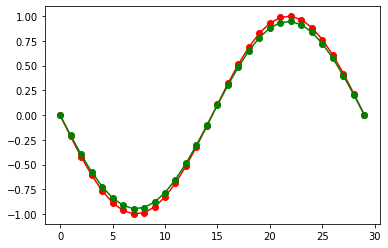

In [53]:
def gradgrad(arr, dx):
    out = np.ones_like(arr)
    (do your stuff here)
    return out

out = gradgrad(sin_, dx)
plt.plot(-sin_, "-or")
plt.plot(out, "-og")
plt.show()


## Iterative solution of the heat equation

Now code the iterative solver of the following equation.

$T_{n+1} = T_{n} + th_{diff} * dt * d^2Tdx^2$

with  $th_{diff}$ the termal diffusion.
The following piece of code gives you the frame

In [6]:
SIZE = 100
LENGHT = 1.
x_coor = np.linspace(0, LENGHT, SIZE)
dx = x_coor[1]-x_coor[0]
temp = np.zeros_like(x_coor)
temp[5]=30.
thermal_diff = 1.88e-5 

dt = 0.49 * dx*dx / thermal_diff

def iteration(temp, dx, dt):
    (do your stuff here)
    return out


for i in range(200):    
    temp = iteration(temp,dx,dt)

    
    
plt.plot(x_coor,temp)
plt.show()


SyntaxError: invalid syntax (<ipython-input-6-5f727ecfd2eb>, line 12)

## stability

Change the time step to reach unstable situations. 
Re-read https://en.wikipedia.org/wiki/Von_Neumann_stability_analysis for reference

## Adding dirichlet boundary conditions

Now adapt your code to solve the problem, initially at 300K everywhere imposing 200K at the left boundary, 700K at the right.

In other words $T[0]=200$ and $T[-1]=700$ at each time step.
You will need to adapt the `gradgrad` function, since the domain is no more periodic 

How would you stop the loop automatically?

# Move to a python Script


Now, move your code from this notebook to a python script 'heat1d.py', and make it work.

If you have spare time, generalize the scrip to two-dimensions.